# 3절. Seaborn

 - matplotlib를 기반으로 만들어진 고수준 그래프 라이브러리 <br>
 공식 사이트 : https://seaborn.pydata.org/ <br>
 그래프 API : https://seaborn.pydata.org/api.html
 <br> <br>
 - Seaborn으로 그래프를 그리기 위해서 다음 단계를 따릅니다.<br>
 1) 데이터 준비 <br>
 2) 미적속성 설정<br>
 3) 함수를 이용하여 그래프 그리기<br>
 4) 그래프 출력, 저장


## 3.1 데이터 준비하기

In [3]:
import seaborn as sns 
iris = sns.load_dataset("iris")
iris.shape

(150, 5)

In [5]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


- **info**에 나오는 수는 **'결측치를 제외한'** 갯수, dtype

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- **astype  형변환**   
- 빈스트링, space가 있으면  **pd.numeric으로 타입변환 (문자 --> 숫자)**

In [7]:
iris.isna().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

- **describe() 도 '결측치를 제외한 '**  요약통계량

In [9]:
iris.describe()  #결측치를 제외한 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- iris.describe(include=all) 하면 species까지 나옴 

In [10]:
iris.describe(exclude='float64') 

,species
count,150
unique,3
top,setosa
freq,50


### (1) R패키지의 데이터 셋 가져오기 (Titanic)

In [14]:
import statsmodels.api as sm
r_titanic = sm.datasets.get_rdataset("Titanic",package="datasets").data
r_titanic.head()

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0


In [17]:
titanic = sns.load_dataset("titanic")
titanic.head()
# survived 생존여부, pclass 티켓클래스1,2,3등석, sibsp(함께 탑승한 형제와 배우자수)
# parch(함께 탑승한 부모, 아이 수)  fare(탑승료)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## 3.2 미적 속성 설정

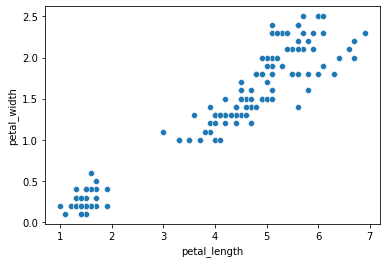

In [22]:
sns.set(style="darkgrid")
# style: white(기본), darkgrid, whitegrid, dark, ticke
ax=sns.scatterplot(x='petal_length',y='petal_width', data=iris)

### (1) 그룹별 색강 조정:  (예:) hue='species'

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

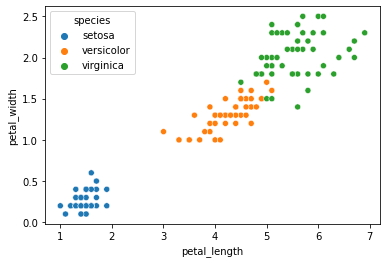

In [23]:
sns.scatterplot(x='petal_length',y='petal_width', data=iris, hue='species')

### (2) 컬러 팔레트 
- 팔레트 사이트 <br>
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html
- http://hleecaster.com/wp-content/uploads/2019/12/article2_image9.png

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

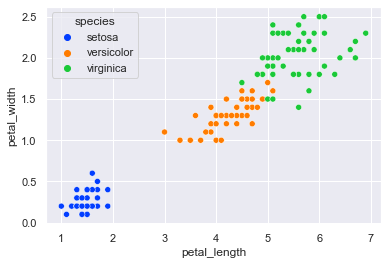

In [25]:
sns.set(palette="bright")
# bright/deep/muted/pastel/dark/color blind/ etc ...
sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='species')

### (3) 컨텍스트 지정(비율)

- scatterplot()

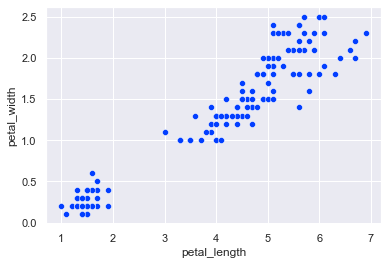

In [27]:
sns.set_context("notebook",font_scale=1.5)   #1:1 비율
# notebook(기본값; 1 비율), paper(0.8), tolk(1,3), poster(1.6)
ax = sns.scatterplot(x='petal_length',y='petal_width',data=iris)

- scatterplot() + lineplot() 

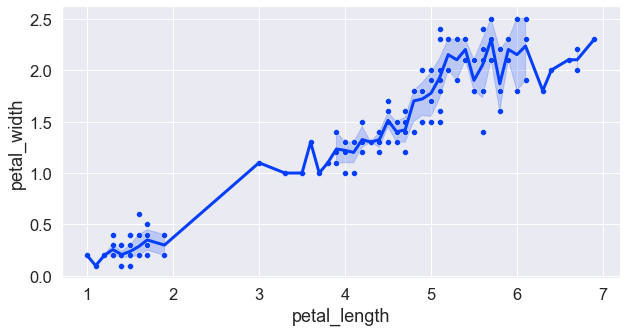

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.set_context("notebook",font_scale=1.5, rc={'lines.linewidth':3})   #1:1 비율
# notebook(기본값; 1 비율), paper(0.8), tolk(1,3), poster(1.6)
sns.lineplot(x='petal_length',y='petal_width',data=iris)
sns.scatterplot(x='petal_length',y='petal_width',data=iris)
plt.show()

## 3.3 Seaborn 함수로 그래프 그리기

### **1) Relational plots: 관계형 그래프 (연속 데이터)**

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

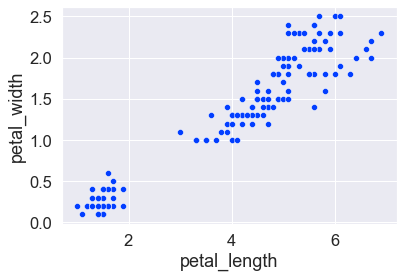

In [34]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris)
plt.show()

####  - hue속성에 '그룹변수를 넣어' 그룹화하여' 그룹별 다른 색상 다른 style'

In [35]:
iris.describe(exclude="float64")

,species
count,150
unique,3
top,setosa
freq,50


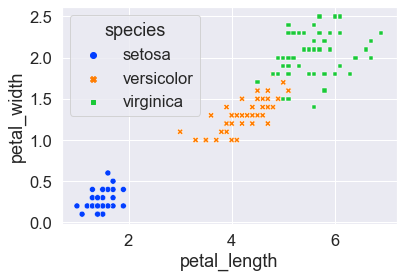

In [37]:
sns.scatterplot(data=iris, x="petal_length",y="petal_width", hue="species", palette="bright", style="species")
plt.show()

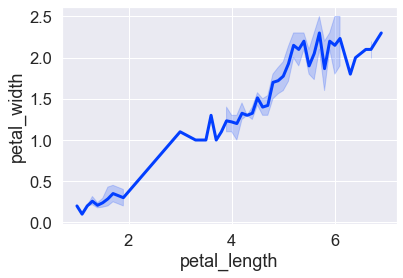

In [38]:
sns.lineplot(x="petal_length",y="petal_width",data=iris)
plt.show()

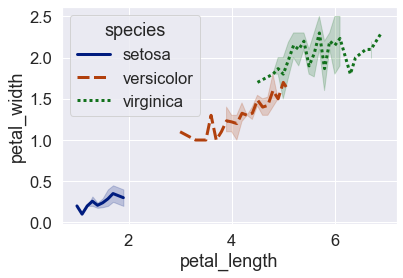

In [40]:
sns.lineplot(x="petal_length",y="petal_width",data=iris, hue="species", style="species", palette="dark")
# sns.scatterplot(x="petal_length",y="petal_width",data=iris, hue="species")
plt.show()

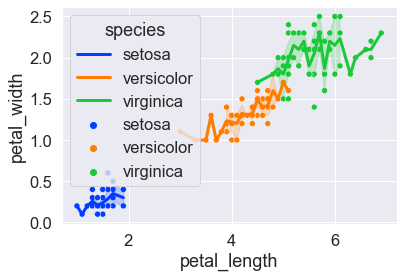

In [42]:
sns.scatterplot(x="petal_length",y="petal_width", data=iris, hue="species")
sns.lineplot(x="petal_length",y="petal_width", data=iris, hue="species")
plt.show()

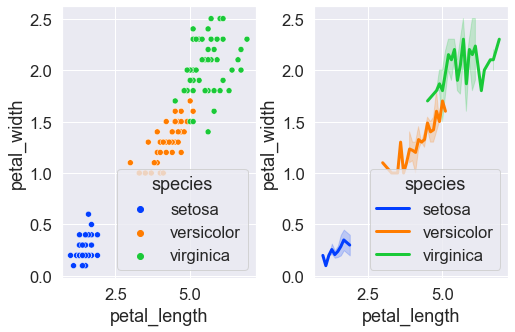

In [46]:
fig, axes = plt.subplots(ncols=2, figsize=(8,5))
plt.subplots_adjust(wspace=0.3)
sns.scatterplot(x="petal_length",y="petal_width",data=iris, hue="species", ax=axes[0])  # 0번째방 그래프 
sns.lineplot(x="petal_length",y="petal_width",data=iris, hue="species", ax=axes[1])     # 1번째방 그래프
plt.show()


###  -  lineplot을 서브플롯으로 표현 : replot


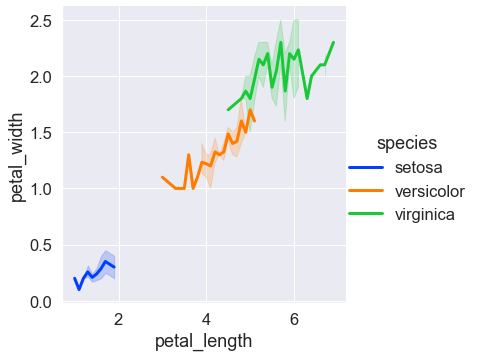

In [51]:
sns.relplot(x="petal_length",y="petal_width",data=iris, hue="species", kind="line") #kind기본값은 scatter

그룹별 각각 그래프로 나눠짐

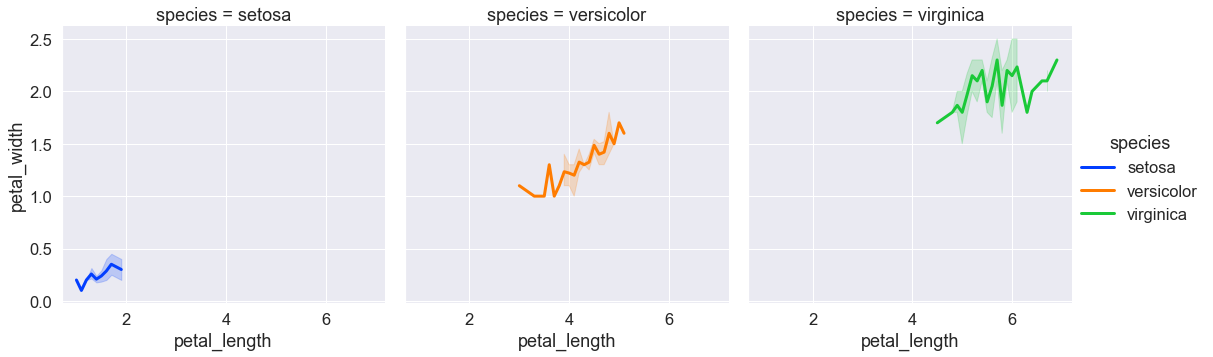

In [52]:
sns.relplot(x="petal_length",y="petal_width",data=iris, hue="species", kind="line", col="species")

2행으로    **col_wrap=2**     

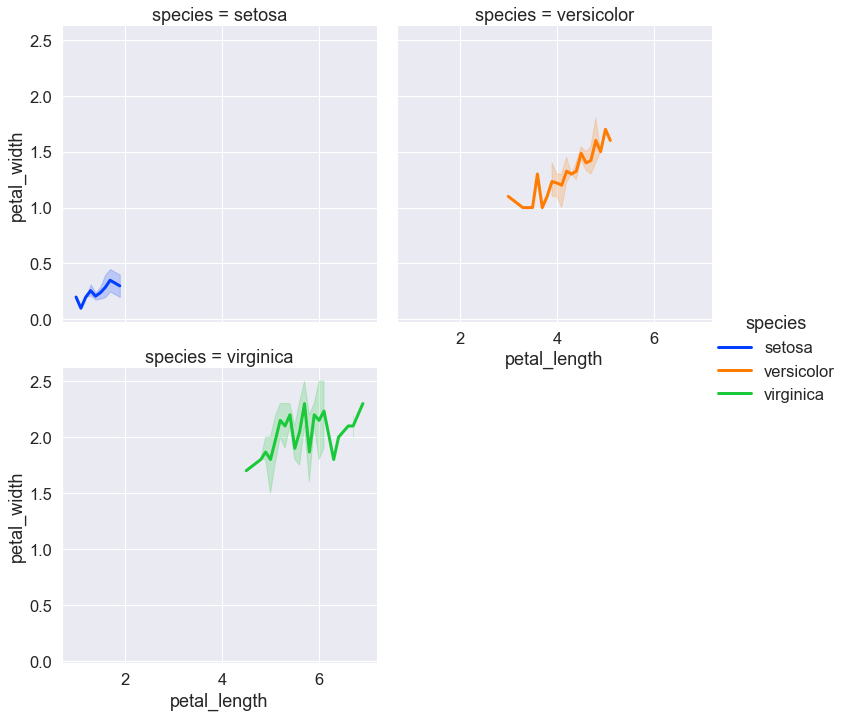

In [55]:
#linelpt을 서브플롯으로 표현: replot
sns.relplot(x="petal_length",y="petal_width",data=iris, hue="species", 
            kind="line",    #기본값은 scatter
            col="species", #col 단위로 서브플롯 표현
            col_wrap=2)    #한줄에 표현될 서브플롯 수


### **2) Categorical plots : 범주형 그래프**


- x축이 범주형 데이터일 경우 scatterplot은 적합하지 않다. 

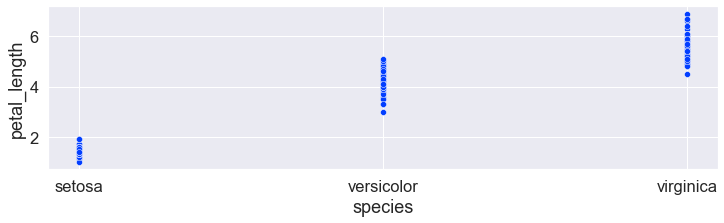

In [58]:
# x축이 범주형 데이터일 경우 scatterplot은 적합하지 않다. 
plt.figure(figsize=(12,3))
ax = sns.scatterplot(x="species",y="petal_length",data=iris)

#### stripplot()

- x축이 범주형일 때 쓰는 산점도1 : 
    - **stripplot():**하나의 변수가 범주형인 산점도를 그림

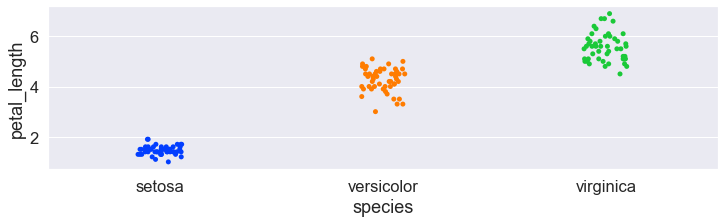

In [60]:
plt.figure(figsize=(12,3))
ax = sns.stripplot(x="species",y="petal_length",data=iris) 

#### swarmplot()

- x축이 범주형일 때 쓰는 산점도2: 
    - **swarmplot():**중첩되지 않는 점들로 범주형 산점도를 그림

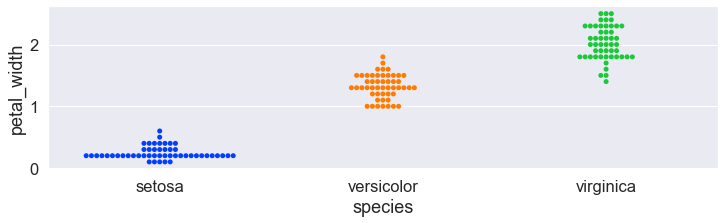

In [62]:
plt.figure(figsize=(12,3))
ax = sns.swarmplot(x="species",y="petal_width",data=iris) 

#### barplot()

- 성별 survived의 평균을 막대그래프로 

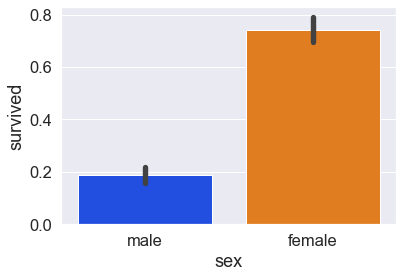

In [65]:
#성별 survived의 평균을 막대그래프로 
a = sns.barplot(x="sex",y="survived",data=titanic)

- class별로 따로 성별 생존률 평균 

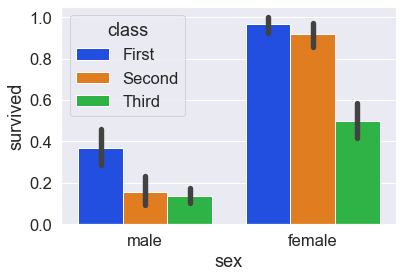

In [70]:
#class별로 따로 성별 생존률 평균 
a = sns.barplot(x="sex",y="survived",data=titanic, hue="class")

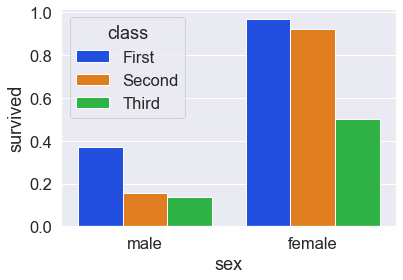

In [71]:
#class별로 따로 성별 생존률 평균 
a = sns.barplot(x="sex",y="survived",data=titanic, hue="class", ci=None)

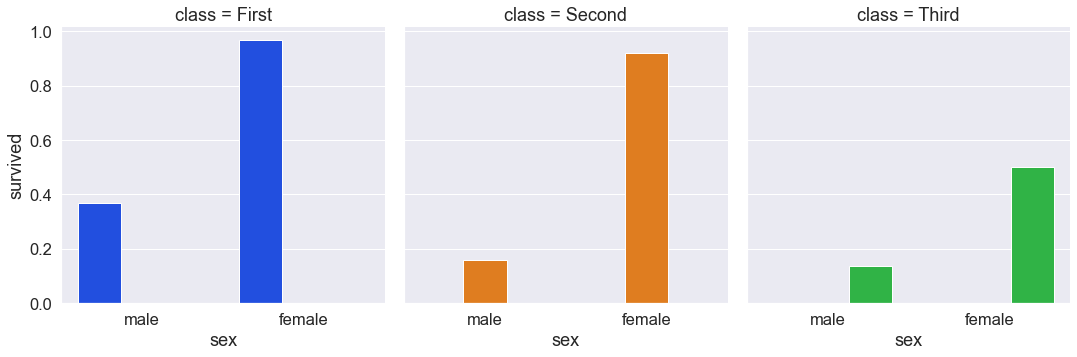

In [74]:
# barplot을 서브플롯으로: catplot
a = sns.catplot(x="sex",y="survived",data=titanic, hue="class", ci=None,
               kind="bar", col="class")

In [75]:
titanic.shape

(891, 15)

In [76]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [78]:
titanic['deck'].isnull().sum()

688

<AxesSubplot:xlabel='deck', ylabel='count'>

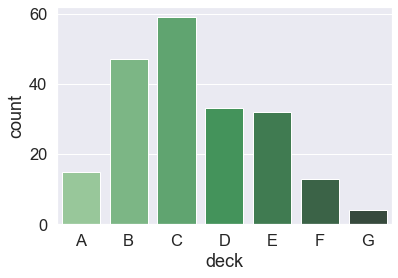

In [79]:
#deck별 관측수를 막대그래프로 
sns.countplot(x="deck", data=titanic, palette="Greens_d")

<AxesSubplot:xlabel='class', ylabel='survived'>

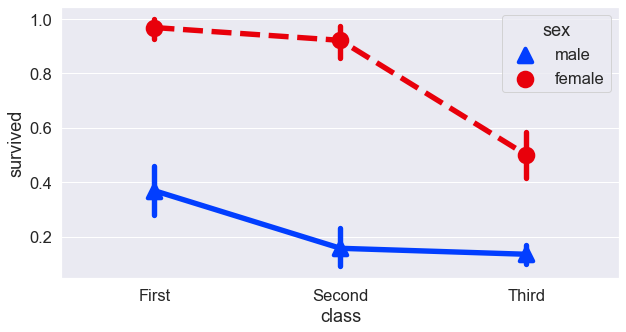

In [82]:
# class별 unsurvived 값을 sex별로 pointplot
plt.figure(figsize=(10,5))
sns.pointplot (x="class",y="survived",hue="sex", data=titanic, palette={"male": "b", "female":"r"},
                markers=["^","o"], 
               linestyles=['-','--'])


<AxesSubplot:xlabel='sex', ylabel='age'>

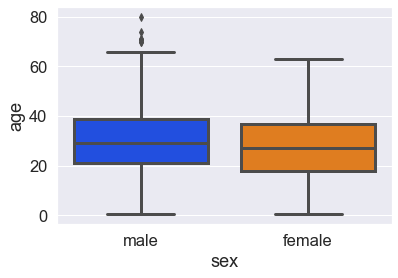

In [83]:
# boxplot, voilinplot,boxenplot
sns.boxplot(x="sex",y="age",data=titanic)

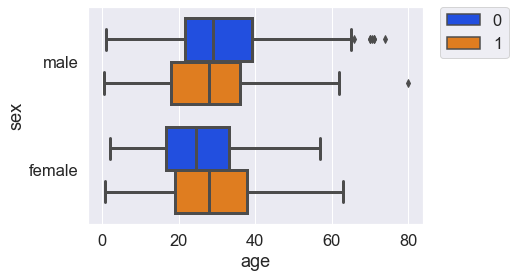

In [87]:
# boxplot, voilinplot,boxenplot
sns.boxplot(y="sex",x="age",data=titanic, hue="survived")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
plt.show()

#### violinplot()

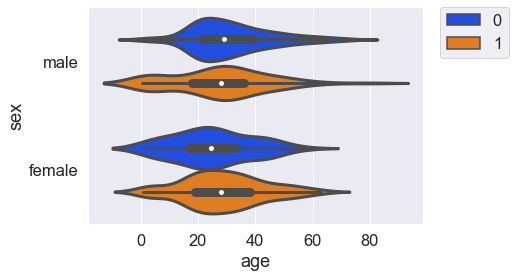

In [89]:
sns.violinplot(y="sex",x="age",data=titanic, hue="survived")
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)

#### boxenplot()

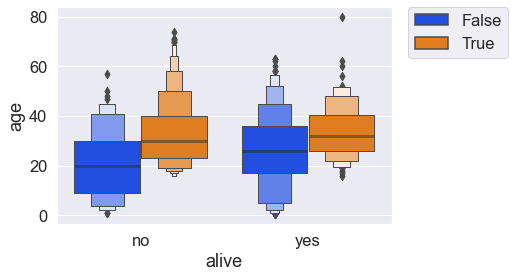

In [92]:
sns.boxenplot(x="alive",y="age",hue="adult_male",data=titanic)
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)

### **3)쌍관계그래프**

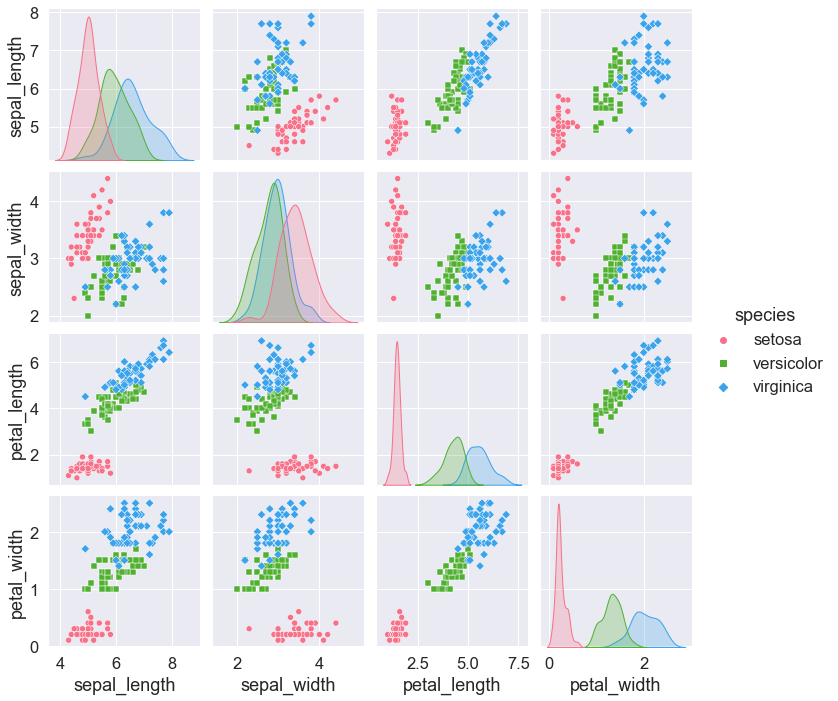

In [93]:
sns.pairplot(data=iris, hue="species",palette="husl",markers=['o','s','D'])

In [95]:
import numpy as np
x = np.random.randn(100)
len(x)

100

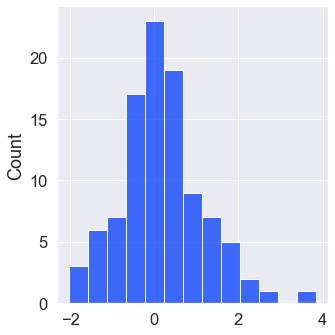

In [97]:
sns.displot(x,kde=False)

### **4)회귀 그래프**

In [101]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


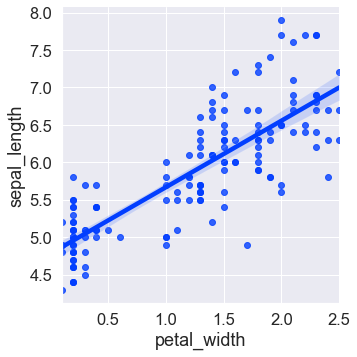

In [104]:
sns.lmplot(x="petal_width",y="sepal_length",data=iris) #위 테이블에서 상관관계 가장 높은 petal_width 와 sepal_length

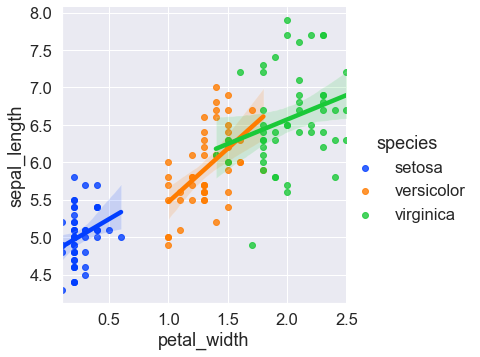

In [105]:
sns.lmplot(x="petal_width",y="sepal_length",data=iris,hue="species") 

<AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>

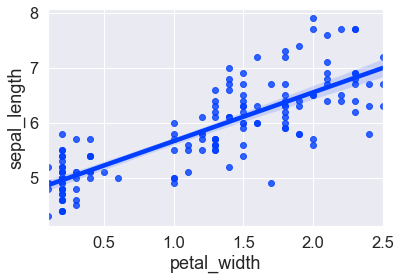

In [106]:
# 회귀모형을 만드는 함수: lmplot, regplot
# regplot의 단점: hue를 못씀 
sns.regplot(x="petal_width",y="sepal_length",data=iris)

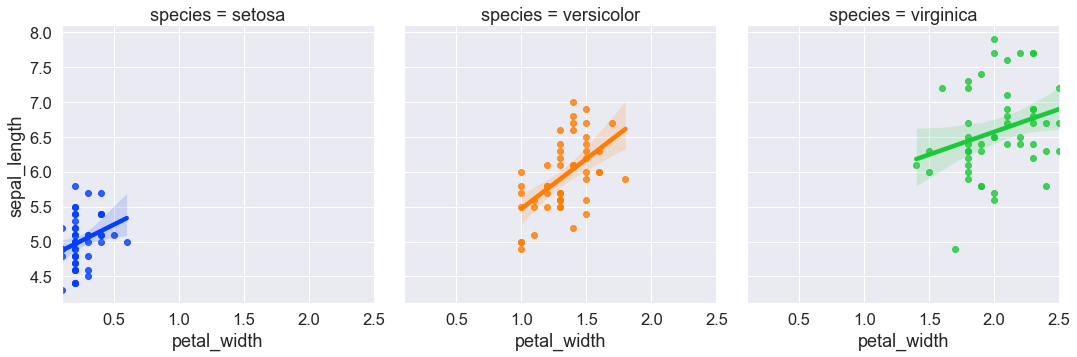

In [107]:
sns.lmplot(x="petal_width",y="sepal_length",data=iris, hue="species", col="species" )

한줄에 그래프2개 그려라

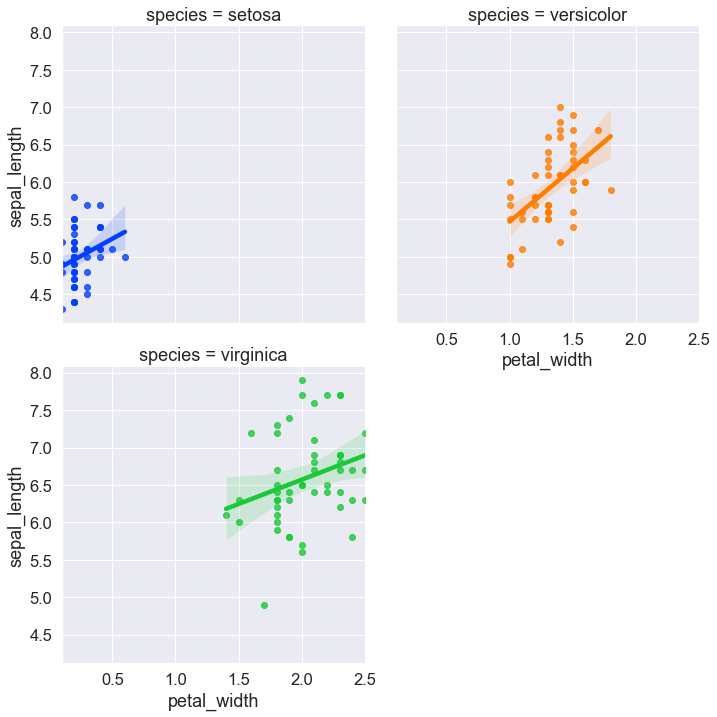

In [108]:
sns.lmplot(x="petal_width",y="sepal_length",data=iris, hue="species", col="species" , col_wrap=2)

### **5)Matrix plots: 행렬 그래프**

In [109]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

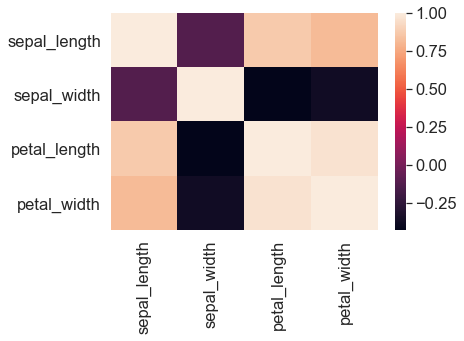

In [110]:
sns.heatmap(iris.corr())

<AxesSubplot:>

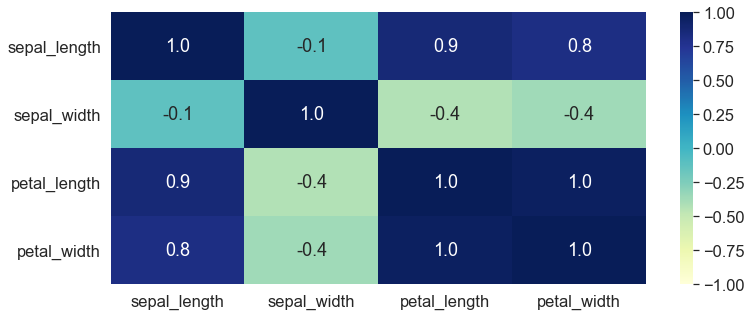

In [116]:
plt.figure(figsize=(12,5))   #사이즈 크게 
sns.heatmap(iris.corr(),vmin=-1,vmax=1,annot=True, cmap="YlGnBu",
           fmt=".1f")                                            #fmt=".1f" 소수점 1자리

## 3.4 다중 그래프를 위한 FacetGrid
- https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

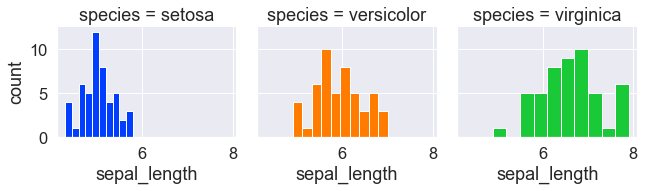

In [120]:
g = sns.FacetGrid(iris,col="species", hue="species")
g.map(plt.hist,'sepal_length')
g.set_axis_labels(y_var="count")
plt.show()

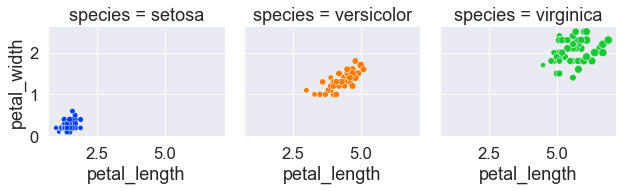

In [122]:
g = sns.FacetGrid(iris, col="species",hue="species")
g.map(sns.scatterplot, "petal_length", "petal_width", size =iris.sepal_length)
plt.savefig('파일이름.png')